---
### Data Preprocessing
---
#### I. Download & export data tables

Download Microsoft and Bitcoin data with `yfinance` library.
Search for the **ticker code** here: https://finance.yahoo.com/.

In [1]:
import yfinance as yf

In [3]:
df_MSFT = yf.download(tickers='MSFT')
df_BTC = yf.download(tickers='BTC-USD')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


---
#### II. Visualize the data with plotly

Candlestick Charts *documentation* here: https://plotly.com/python/candlestick-charts/.

In [4]:
import plotly.graph_objects as go

In [5]:
df_MSFT.columns = df_MSFT.columns.droplevel('Ticker')  # Flatten the columns
df_BTC.columns = df_BTC.columns.droplevel('Ticker')

In [6]:
fig = go.Figure(data=[go.Candlestick(
                x=df_MSFT.index,
                open=df_MSFT['Open'],
                high=df_MSFT['High'],
                low=df_MSFT['Low'],
                close=df_MSFT['Close']
    )])
fig.show()

In [7]:
fig = go.Figure(data=[go.Candlestick(
                x=df_BTC.index,
                open=df_BTC['Open'],
                high=df_BTC['High'],
                low=df_BTC['Low'],
                close=df_BTC['Close']
    )])
fig.show()

---
#### III. Export the data

**MSFT** data.

In [8]:
# To Excel
df_MSFT.to_excel('data/Microsoft_Stock_Price_Historical_Daily.xlsx')

In [9]:
# To CSV (less size in memory)
df_MSFT.to_csv('data/Microsoft_Stock_Price_Historical_Daily.csv')

**BTC** data.

In [10]:
ticker = 'BTC-USD'                         # Define ticker
df_ticker = yf.download(ticker)            # Download OLHVC
df_ticker.to_excel(f'data/{ticker}.xlsx')  # Create file path + save to xlsx
df_ticker.to_csv(f'data/{ticker}.csv')     # Create file path + save to csv

[*********************100%***********************]  1 of 1 completed


---
#### IV. Data Preprocessing

**Load** the data.

In [11]:
import pandas as pd

In [12]:
df_microsoft = pd.read_excel(
    'data/Microsoft_Stock_Price_Historical_Daily.xlsx',
    parse_dates=['Date'], index_col=0
)

df_microsoft.head(5)

,Close,High,Low,Open,Volume
Date,,,,,
1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400


**Filter** the data.

In [13]:
# Select from the acquisition of LinkedIn
df_microsoft_linkedin = df_microsoft.loc['2016-12-08':,:].copy()

Create a new column: MSFT's 'tomorrow' percentage change. Hence, we use `pct_change(-1)` and then multiply again by $-1$, in order not to have the percentage change computed backwards...

In [14]:
df_microsoft_linkedin['change_tomorrow'] = df_microsoft_linkedin.Close.pct_change(-1) * 100 * -1
df_microsoft_linkedin = df_microsoft_linkedin.dropna().copy()  # Remove last N/a value
df_microsoft_linkedin.head(5)

,Close,High,Low,Open,Volume,change_tomorrow
Date,,,,,,
2016-12-08,55.181126,55.696671,55.027369,55.443420,21220800,1.549151
2016-12-09,56.049416,56.067505,55.289669,55.334891,27349400,0.321666
2016-12-12,56.230289,56.347870,55.823285,55.913730,20198100,1.286169
2016-12-13,56.962929,57.360890,56.293630,56.528788,35718900,-0.478644
2016-12-14,56.691578,57.388013,56.555907,56.981005,30352700,-0.159789


*Did the stock go up or down?*

In [15]:
import numpy as np

Create a new column: MSFT's daily 'direction'. If the variable `change_tomorrow` is positive, `change_tomorrow_direction` will be equl to `UP`, else, `DOWN`.

In [16]:
df_microsoft_linkedin['change_tomorrow_direction'] = np.where(
    df_microsoft_linkedin.change_tomorrow > 0, 'UP', 'DOWN')

df_microsoft_linkedin.change_tomorrow_direction.value_counts()

change_tomorrow_direction
UP      1127
DOWN     964
Name: count, dtype: int64

Plot the Microsoft stock price after the acquisition of *LinkedIn*.

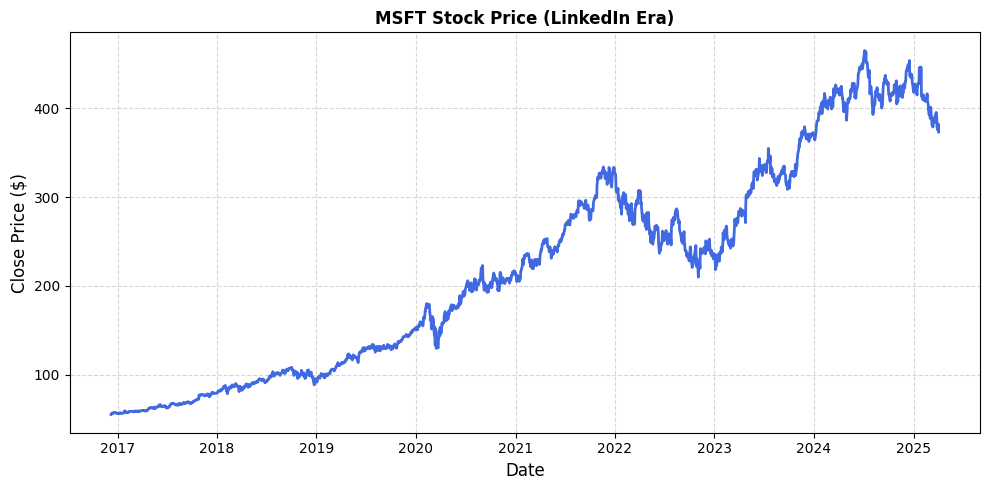

In [17]:
#df_microsoft_linkedin.Close.plot()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_microsoft_linkedin.index, df_microsoft_linkedin['Close'], color='royalblue', linewidth=2)

plt.title('MSFT Stock Price (LinkedIn Era)', fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Export the preprocessed `DataFrame` into an Excel.

In [18]:
df_microsoft_linkedin.to_excel('data/Microsoft_LinkedIn_Processed.xlsx')